## 1. 데이터 수집 및 전처리
* 행정안전부 > 주민등록인구통계 > 연령별 인구 통계 

    https://jumin.mois.go.kr/index.jsp

    성별구분안함. 1세단위, 0~100세이상, 전체읍면동 현황

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

In [4]:
os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Age Data')

['202210_202210_연령별인구현황_월간.csv']

In [5]:
data_src = "./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Age Data/202210_202210_연령별인구현황_월간.csv"

## 1.1. 데이터프레임 생성

In [6]:
df = pd.read_csv(data_src, encoding='cp949')
df.head(3)

# 컬럼 정리가 필요해보인다. 행정구역은 인덱스로 쓰면 좋을듯하다.

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
0,서울특별시 (1100000000),"9,443,722","9,443,722","40,810","44,165","44,886","48,835","51,417","55,828","63,944",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
1,서울특별시 종로구 (1111000000),"141,861","141,861",451,478,513,544,562,659,771,...,168,134,111,89,69,47,27,22,16,31
2,서울특별시 종로구 청운효자동(1111051500),"11,700","11,700",45,48,47,55,47,82,77,...,16,7,7,5,5,5,3,3,0,3


## 1.2. 컬럼 삭제

In [9]:
df.drop(columns=['2022년10월_계_총인구수','2022년10월_계_연령구간인구수'], inplace=True)

In [10]:
df.head(1)

,행정구역,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
0,서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"


## 1.3. 인덱스 변경

In [11]:
df.index=df['행정구역']
df.head()

,행정구역,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
서울특별시 종로구 (1111000000),서울특별시 종로구 (1111000000),451,478,513,544,562,659,771,827,871,...,168,134,111,89,69,47,27,22,16,31
서울특별시 종로구 청운효자동(1111051500),서울특별시 종로구 청운효자동(1111051500),45,48,47,55,47,82,77,96,100,...,16,7,7,5,5,5,3,3,0,3
서울특별시 종로구 사직동(1111053000),서울특별시 종로구 사직동(1111053000),27,35,36,38,50,60,66,68,77,...,16,11,18,5,6,5,6,2,3,2
서울특별시 종로구 삼청동(1111054000),서울특별시 종로구 삼청동(1111054000),3,6,6,3,9,13,9,15,11,...,3,5,2,3,1,1,0,1,0,2


In [12]:
# 행정구역 컬럼은 삭제
df.drop(columns=['행정구역'], inplace=True)
df.head()

,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,2022년10월_계_9세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813","67,938",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
서울특별시 종로구 (1111000000),451,478,513,544,562,659,771,827,871,839,...,168,134,111,89,69,47,27,22,16,31
서울특별시 종로구 청운효자동(1111051500),45,48,47,55,47,82,77,96,100,87,...,16,7,7,5,5,5,3,3,0,3
서울특별시 종로구 사직동(1111053000),27,35,36,38,50,60,66,68,77,64,...,16,11,18,5,6,5,6,2,3,2
서울특별시 종로구 삼청동(1111054000),3,6,6,3,9,13,9,15,11,13,...,3,5,2,3,1,1,0,1,0,2


## 1.4. 컬럼명 변경

In [13]:
# 연령에 대한 부분만 남기고 삭제
df.columns = df.columns.str.split('_').str[2]

In [15]:
df.head(1)

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813","67,938",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"


## 1.5. 자료형 확인/변경

In [16]:
# 자료형 확인
df.dtypes

0세         object
1세         object
2세         object
3세         object
4세         object
            ...  
96세        object
97세        object
98세        object
99세        object
100세 이상    object
Length: 101, dtype: object

In [21]:
# 문자형을 숫자형으로 변환한다.
# 콤마 삭제 후 변환
df.iloc[:,0].str.replace(',','').astype('int64')

AttributeError: ignored

In [20]:
# 모든 행에 반복해준다.
for i in range(101):
    df.iloc[:,i] =df.iloc[:,i].str.replace(',','').astype('int64')
df.dtypes

0세         int64
1세         int64
2세         int64
3세         int64
4세         int64
           ...  
96세        int64
97세        int64
98세        int64
99세        int64
100세 이상    int64
Length: 101, dtype: object

## 2. 시도-연령별 인구구조

### 2.1. 서브셋 만들기
* 컬럼.str.contains(문자열) : 해당 문자열이 포함된 데이터 추출

In [24]:
# 00000000 를 포함한 인덱스의 데이터만 가져오기
df_sido = df[df.index.str.contains('00000000')].copy()
df_sido

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),40810,44165,44886,48835,51417,55828,63944,66913,66813,67938,...,7599,6628,5436,4014,2948,1801,1254,926,796,1301
부산광역시 (2600000000),13662,14937,16060,17638,19866,22065,25134,26532,26264,26238,...,3051,2350,2031,1536,1096,604,465,287,247,394
대구광역시 (2700000000),9963,10997,12143,13681,15174,16909,19577,20269,20175,20312,...,2126,1602,1243,976,675,375,302,175,133,250
인천광역시 (2800000000),14426,15777,16823,18793,19775,21800,24560,26117,25678,26143,...,2520,2115,1705,1245,958,588,454,282,251,421
광주광역시 (2900000000),7338,8113,8129,9157,10196,11167,12871,13420,13688,13879,...,1175,1146,753,550,386,265,193,92,133,169
대전광역시 (3000000000),7554,7961,7996,8846,9477,10712,12125,12809,12539,13175,...,1204,1036,783,631,430,246,205,126,109,181
울산광역시 (3100000000),5317,6118,6627,7324,8067,9091,10448,11032,11031,11093,...,658,478,425,317,219,132,112,75,59,60
세종특별자치시 (3600000000),3074,3665,3715,4211,4480,4935,5389,5708,5476,5535,...,257,218,189,138,92,49,39,20,29,32
경기도 (4100000000),73700,79642,83956,92094,99933,108674,123195,130215,128434,129238,...,10537,9305,7212,5476,3831,2370,1838,1182,1063,1732


### 2.2. 시각화

#### 2.2.1. 다중플롯

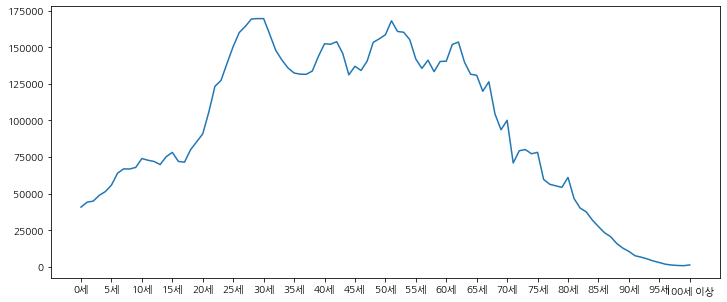

In [27]:
# 서울특별시의 연령별 인구구조
plt.rcParams['figure.figsize']=(12,5)
plt.plot(df_sido.iloc[0])
plt.xticks(range(0,101,5))
plt.show()

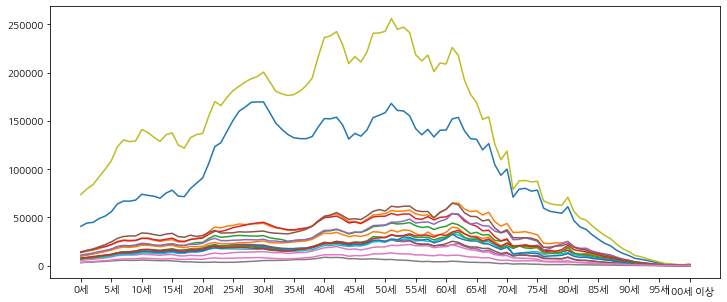

In [28]:
# 구별 연령별 인구구조
for i in range(len(df_sido)):
    plt.plot(df_sido.iloc[i])
plt.xticks(range(0,101,5))
plt.show()

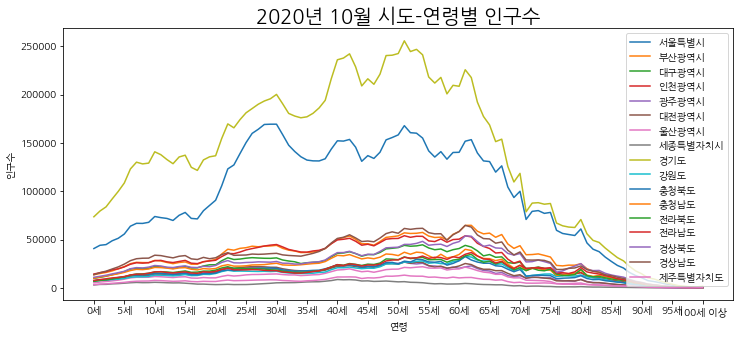

In [33]:
# 범례, 레이블, 제목 표시
for i in range(len(df_sido)):
    plt.plot(df_sido.iloc[i], label=df_sido.index[i].split(' ')[0])
plt.legend()
plt.xticks(range(0,101,5))
plt.xlabel('연령')
plt.ylabel('인구수')
plt.title('2020년 10월 시도-연령별 인구수', size=20)
plt.show()

# 그래프 하나씩 보기가 힘들다.

#### 2.2.2. 서브플롯
* plt.subplot(행,열,순번)

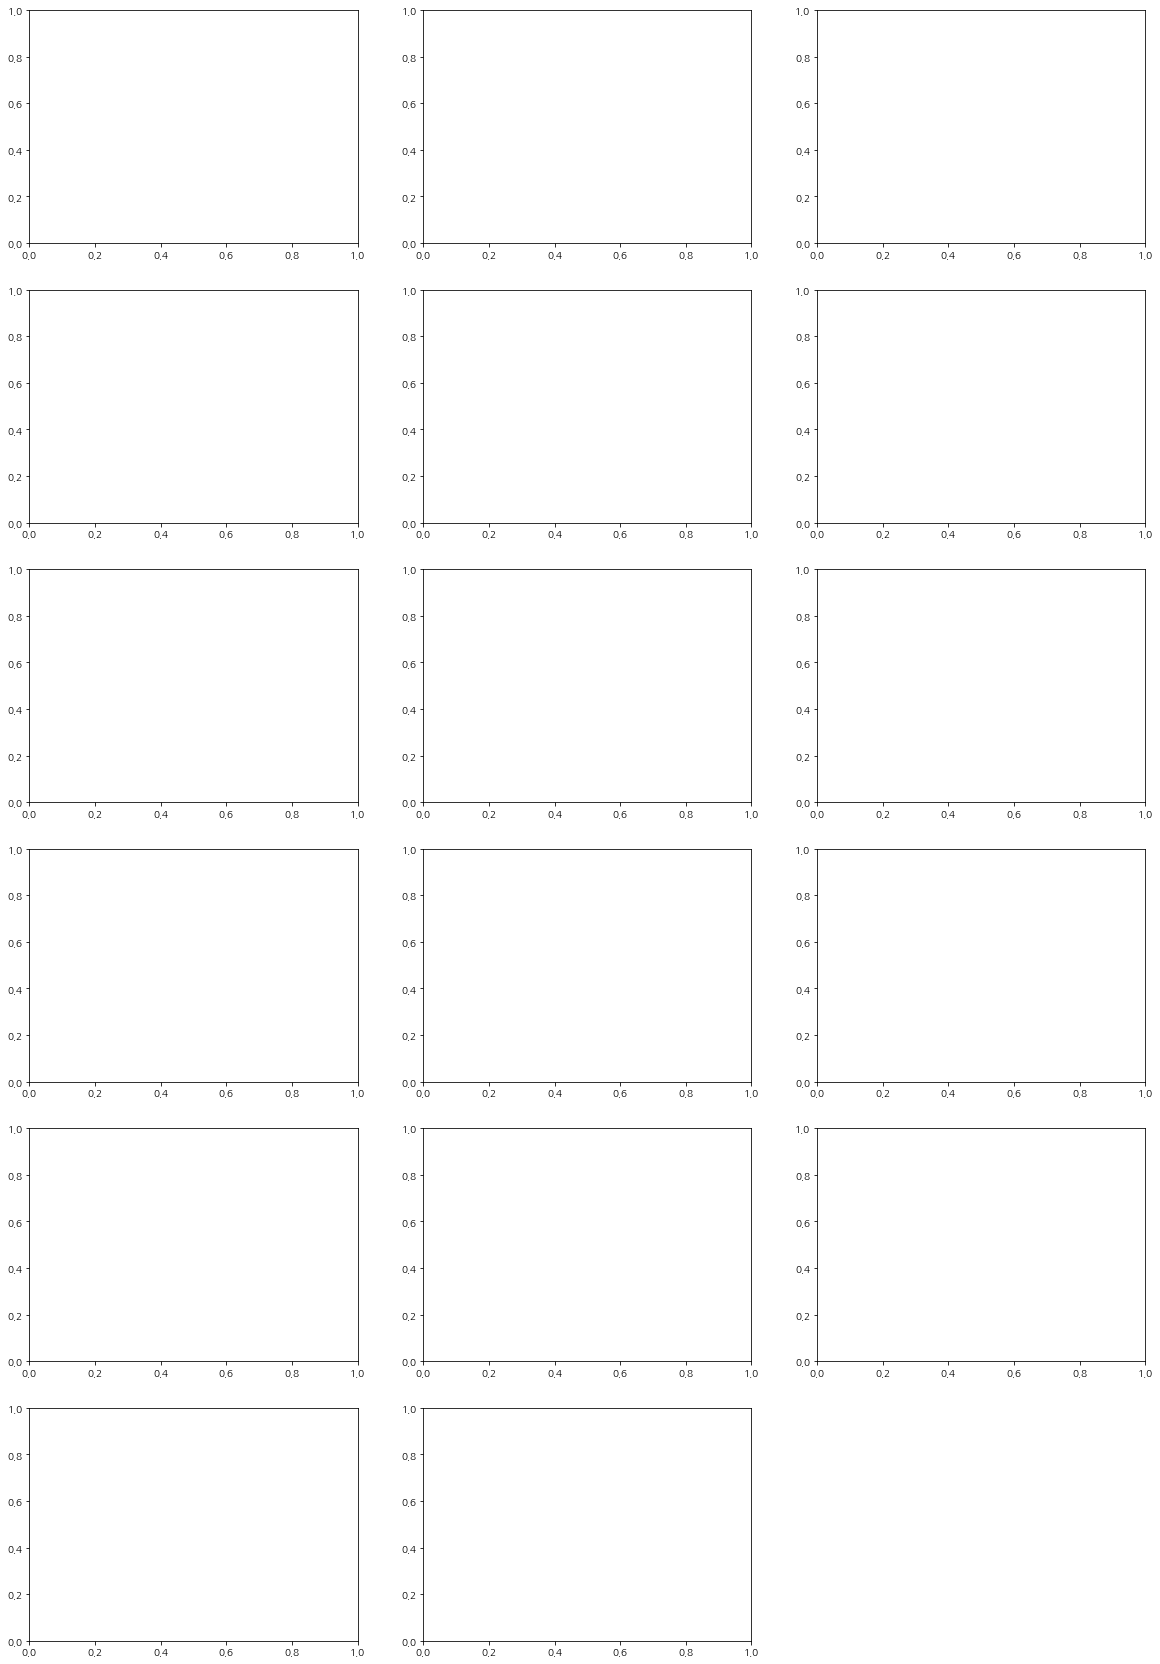

In [34]:
# 틀만들기(17개)
plt.figure(figsize=(20,30))
for i in range(len(df_sido)):
    plt.subplot(6,3,i+1)

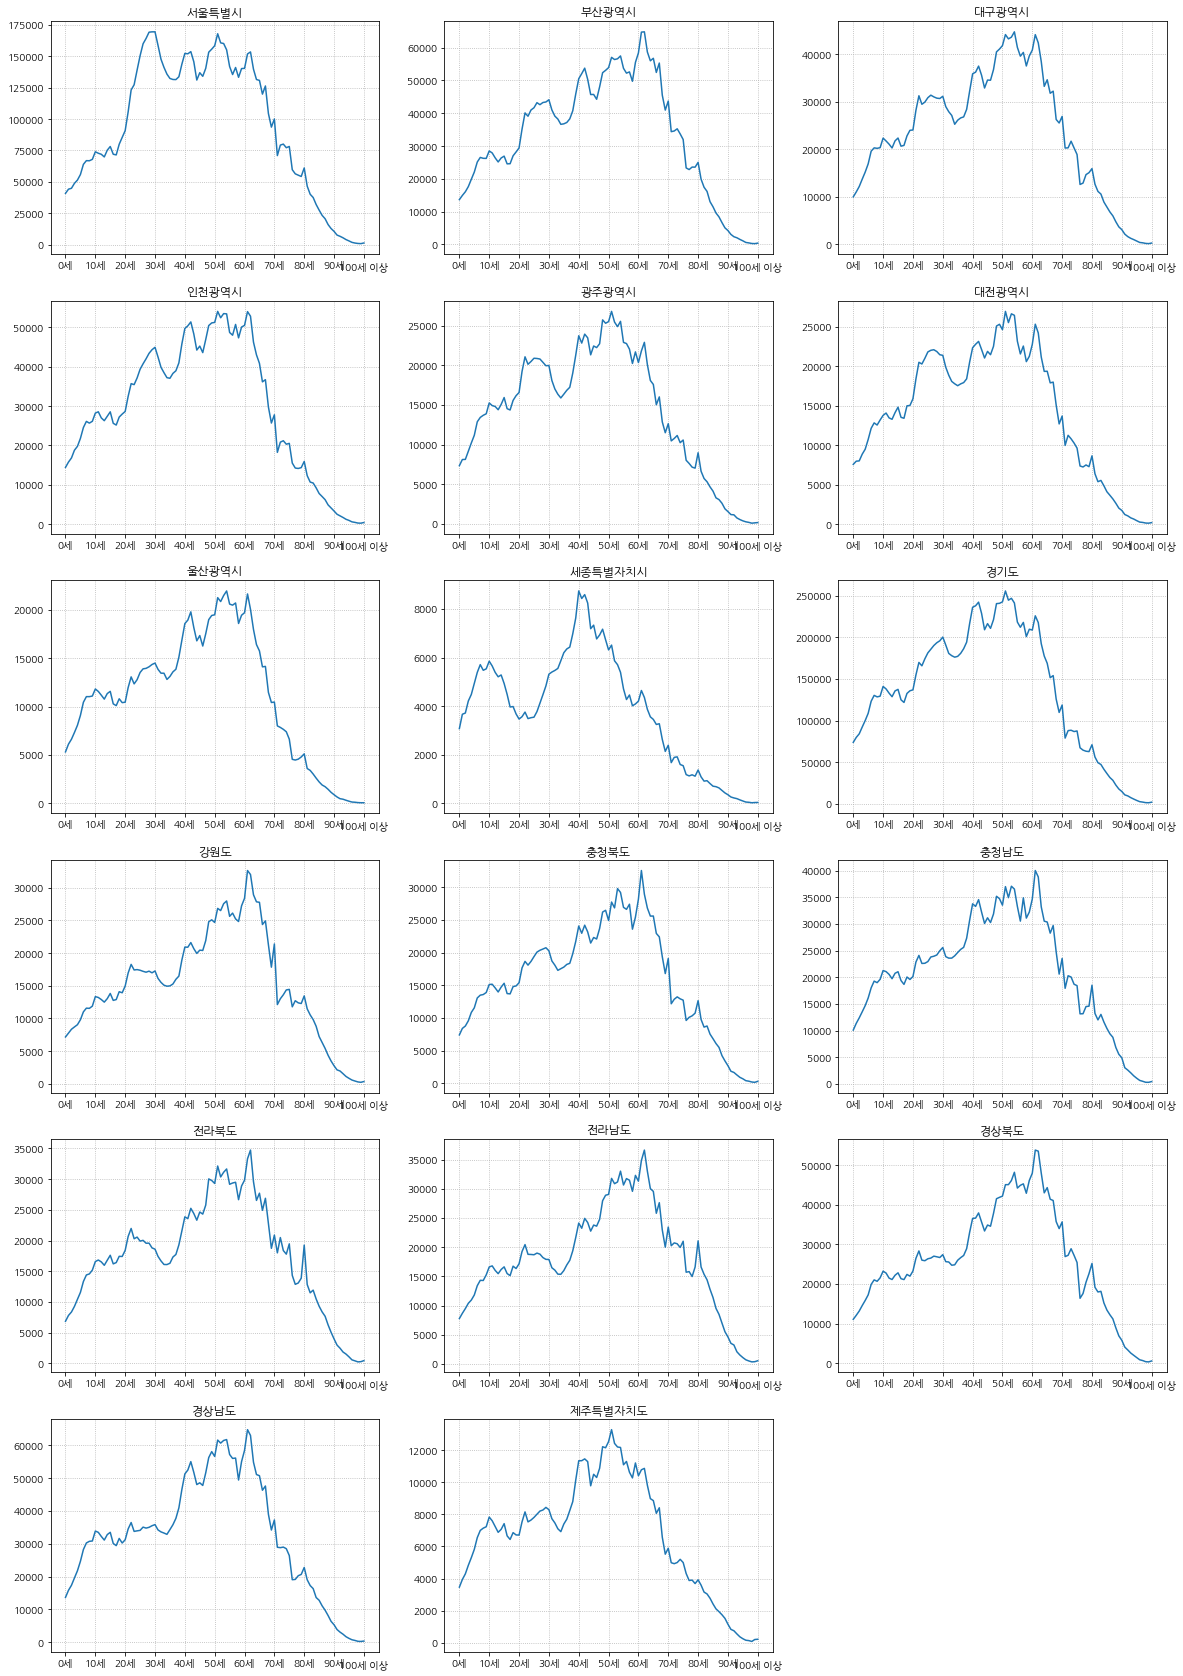

In [39]:
# 그래프 그리기
plt.figure(figsize=(20,30))
for i in range(len(df_sido)):
    plt.subplot(6,3,i+1)
    plt.plot(df_sido.iloc[i])
    plt.xticks(range(0,101,10))
    plt.title(df_sido.index[i].split(' ')[0])
    plt.grid(ls=':')

plt.show()
# 제주를 제외 지방은 60대가 가장 많다.